# Logistic Regression and the ROC Curve

## Intuition

* Logistic regression outputs probabilities
* if the probability 'p' is greater than 0.5:
    - The data is labeled '1'
* if the probability 'p' is less than 0.5:
    - The data is labeled '0'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set()
data_path = "../datasets/"

In [2]:
col_names = [
    "party",
    "infants",
    "water",
    "budget",
    "physician",
    "salvador",
    "religious",
    "satellite",
    "aid",
    "missile",
    "immigration",
    "synfuels",
    "education",
    "superfund",
    "crime",
    "duty_free_exports",
    "eaa_rsa",
]

voting = pd.read_csv(data_path + "house-votes-84.csv", names=col_names, dtype="category")
for i in range(1, voting.shape[1]):
    voting[col_names[i]] = voting[col_names[i]].cat.rename_categories({"y": 1, "n": 0, "?": 2})
    voting[col_names[i]].cat.as_unordered()

voting['party'] = voting['party'].cat.rename_categories({'democrat': 0, 'republican': 1})
voting['party'].cat.as_unordered()
voting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   party              435 non-null    category
 1   infants            435 non-null    category
 2   water              435 non-null    category
 3   budget             435 non-null    category
 4   physician          435 non-null    category
 5   salvador           435 non-null    category
 6   religious          435 non-null    category
 7   satellite          435 non-null    category
 8   aid                435 non-null    category
 9   missile            435 non-null    category
 10  immigration        435 non-null    category
 11  synfuels           435 non-null    category
 12  education          435 non-null    category
 13  superfund          435 non-null    category
 14  crime              435 non-null    category
 15  duty_free_exports  435 non-null    category
 16  eaa_rsa 

In [3]:
voting.head()

party infants water budget physician salvador religious satellite aid  \
0     1       0     1      0         1        1         1         0   0   
1     1       0     1      0         1        1         1         0   0   
2     0       2     1      1         2        1         1         0   0   
3     0       0     1      1         0        2         1         0   0   
4     0       1     1      1         0        1         1         0   0   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       0           1        2         1         1     1                 0   
1       0           0        0         1         1     1                 0   
2       0           0        1         0         1     1                 0   
3       0           0        1         0         1     0                 0   
4       0           0        1         2         1     1                 1   

  eaa_rsa  
0       1  
1       2  
2       0  
3       1  
4       1

In [4]:
X = voting.drop('party', axis=1).values
y = voting.party.values

print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (435, 16)
y shape: (435,)


In [5]:
splits = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = splits

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [6]:
y_pred[:5]

array([0, 0, 1, 1, 1])

#### default threshold is 0.5

when the threshold equals `0`, the model predicts `1` for all data.
which means the _true positive rate_ is equal to the _false positive rate_ is equal to the `1`.

When threshold equals to `1`, the model predicts `0` for all, which means that both _true and false positive rates_ are `0`.

if we vary the threshold between two extremes `0 & 1`, we get a series of different false positive and true positive rates. The set of points we get when trying all possible thresholds is called the **receiver operating characteristic curve** or **ROC curve**.

## Plotting the ROC curve

In [7]:
from sklearn.metrics import roc_curve

In [8]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

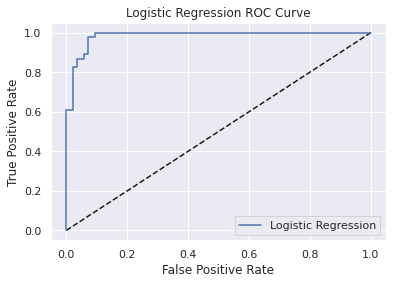

In [9]:
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set(title="Logistic Regression ROC Curve",
       xlabel='False Positive Rate',
       ylabel='True Positive Rate')
ax.legend()
plt.show()

In [10]:
logreg.predict_proba(X_test)[:5, :]

array([[0.92422205, 0.07577795],
       [0.98097657, 0.01902343],
       [0.00888587, 0.99111413],
       [0.05239724, 0.94760276],
       [0.12423654, 0.87576346]])

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
print(confusion_matrix(y_test, y_pred))

[[80  5]
 [ 5 41]]


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        85
           1       0.89      0.89      0.89        46

    accuracy                           0.92       131
   macro avg       0.92      0.92      0.92       131
weighted avg       0.92      0.92      0.92       131



In [14]:
cm = confusion_matrix(y_test, y_pred)
cm_table = pd.DataFrame(cm)
cm_table.columns = ['democrat', 'republican']
cm_table['actual_class'] = ['democrat', 'republican']
cm_table.set_index('actual_class', inplace=True)
cm_table

democrat  republican
actual_class                      
democrat            80           5
republican           5          41

The class is positive(1) if party is republic

In [15]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
print(f"\nsensitivity: {sensitivity}\nspecificity: {specificity}\nprecision: {precision}")


sensitivity: 0.8913043478260869
specificity: 0.9411764705882353
precision: 0.8913043478260869


## Area Under the ROC Curve

In [16]:
from sklearn.metrics import roc_auc_score

In [17]:
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred_prob)}")

ROC AUC score: 0.9838874680306905


### AUC using cross-validation

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.99112098 0.98945616 0.98945616 0.99270483 0.95005612]


## Hyperparameter tuning

In [20]:
# grid search cross validation
from sklearn.model_selection import GridSearchCV

C controls the inverse of the regularization strength, and this is what we will tune. A large C can lead to an overfit model, while a small C can lead to an underfit model.

In [21]:
c_space = np.logspace(-5, 8, 15)
parameters = {'C': c_space}

logreg_cv = GridSearchCV(logreg, parameters, cv=5)
logreg_cv.fit(X, y)

print(f"Tuned Logistic Regression Parameters: {logreg_cv.best_params_}")
print(f"Best Score: {logreg_cv.best_score_}")

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best Score: 0.9379310344827587


### Randomized search CV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [22]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [24]:
diabetes = pd.read_csv(data_path + "diabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
X_diab = diabetes.drop('diabetes', axis=1).values
y_diab = diabetes.diabetes.values

print(f"X shape: {X_diab.shape}")
print(f"y shape: {y_diab.shape}")

X shape: (768, 8)
y shape: (768,)


In [26]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_diab, y_diab)

# Print the tuned parameters and score
print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")
print(f"Best score is {tree_cv.best_score_}")

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 5}
Best score is 0.7396316102198455


### Hold-out set for final evaluation

In [28]:
splits = train_test_split(X_diab, y_diab, test_size=0.3, random_state=42)
X_train_diab, X_test_diab, y_train_diab, y_test_diab = splits
print(f"X_train_diab shape: {X_train_diab.shape}")
print(f"X_test_diab shape: {X_test_diab.shape}")
print(f"y_train_diab shape: {y_train_diab.shape}")
print(f"y_test_diab shape: {y_test_diab.shape}")

X_train_diab shape: (537, 8)
X_test_diab shape: (231, 8)
y_train_diab shape: (537,)
y_test_diab shape: (231,)


In [30]:
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train_diab, y_train_diab)

# Print the tuned parameters and score
print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")
print(f"Best score is {tree_cv.best_score_}")

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.7504499826929732


In [32]:
# voting data
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='liblinear')  # default is 'lbfgs' which handle L2 or no penalty

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9425979680696661
